In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
baseline_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history_base = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


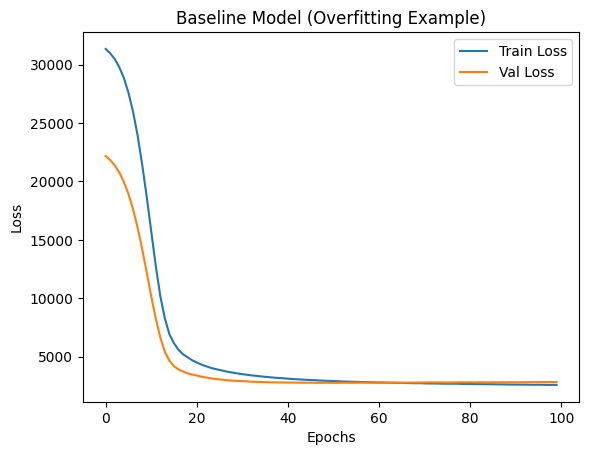

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Val Loss')
plt.title("Baseline Model (Overfitting Example)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.regularizers import l2


In [10]:
l2_model = Sequential([
    Dense(128, activation='relu',
          kernel_regularizer=l2(0.01),
          input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu',
          kernel_regularizer=l2(0.01)),
    Dense(1)
])

l2_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history_l2 = l2_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


In [11]:
from tensorflow.keras.layers import Dropout


In [12]:
dropout_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

dropout_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history_dropout = dropout_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

early_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

early_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history_early = early_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)


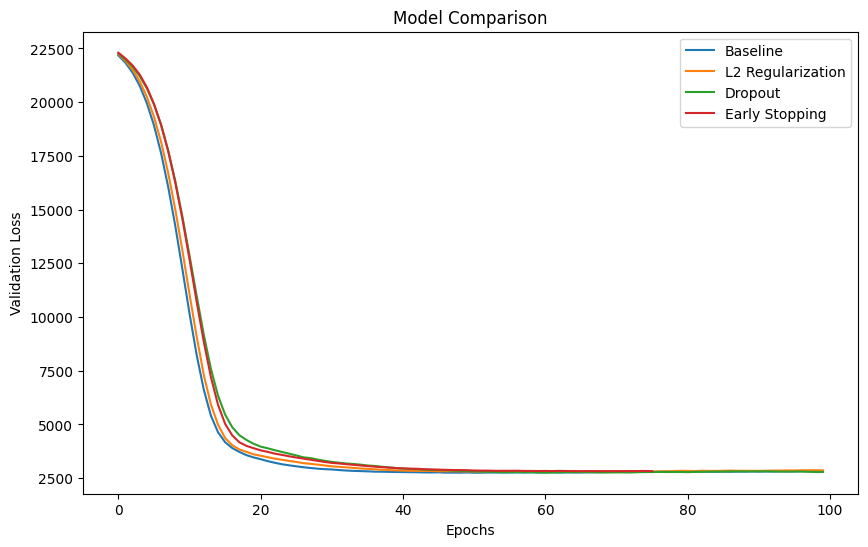

In [15]:
plt.figure(figsize=(10,6))

plt.plot(history_base.history['val_loss'], label='Baseline')
plt.plot(history_l2.history['val_loss'], label='L2 Regularization')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.plot(history_early.history['val_loss'], label='Early Stopping')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Model Comparison")
plt.legend()
plt.show()


In [16]:
print("Baseline MAE:", baseline_model.evaluate(X_test, y_test, verbose=0)[1])
print("L2 MAE:", l2_model.evaluate(X_test, y_test, verbose=0)[1])
print("Dropout MAE:", dropout_model.evaluate(X_test, y_test, verbose=0)[1])
print("EarlyStopping MAE:", early_model.evaluate(X_test, y_test, verbose=0)[1])


Baseline MAE: 42.24246597290039
L2 MAE: 42.52017593383789
Dropout MAE: 42.53403091430664
EarlyStopping MAE: 44.19016647338867
